# I - IMPORTNG LIBRARIES

In [405]:

import pandas as pd
import numpy as np



import pymysql
from sqlalchemy import create_engine


import fredapi as fa

from getpass import getpass



from datetime import datetime
from datetime import timedelta




import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
import math


from scipy.stats import ttest_1samp





from sklearn.feature_selection import RFE # Recursive Feature Elimination






from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression as LinReg






%matplotlib inline


# II - Functions to be used

In [406]:
def nform (row) :
    date_sr = pd.to_datetime(row['date'])
    novof  = date_sr.strftime('%d/%m/%Y')
    
    
    
    return novof 

# III - Activating the connection with FRED

In [407]:
password=getpass()    # safe password to access the database



········


In [408]:
fred = fa.Fred(password)


# IV.1 - Reading information from FRED´s API 

In [409]:
gdp=fred.get_series('NA000334Q') 

gdp.shape

(302,)

In [410]:
inflation=fred.get_series('CPALTT01USQ657N')

inflation.shape

(269,)

In [411]:
interest=fred.get_series('BOGZ1FL072052006Q')

interest.shape

(271,)

In [412]:
unemployment=fred.get_series('NROUST')

unemployment.shape

(332,)

In [413]:
indpro=fred.get_series('IPB50001NQ')

indpro.shape

(414,)

In [414]:
PubDeficit=fred.get_series('M318501Q027NBEA')

PubDeficit.shape

(246,)

In [415]:
PubDebt=fred.get_series('GFDEBTN')

PubDebt.shape


(225,)

In [416]:
FX_USD_EUR=fred.get_series('CCUSSP01EZQ650N')

FX_USD_EUR.shape

(94,)

In [417]:
CorpProfit=fred.get_series('BOGZ1FU096060035Q')

CorpProfit.shape

(302,)

# IV.2 - Reading S&P500 from a csv (Wall Street jornal)

In [418]:
S_P = pd.read_csv('S&P 500 20y daily.csv')

In [419]:


S_P.shape


(5688, 5)

In [420]:
S_P.head(20)

,Date,Open,High,Low,Close
0,08/10/22,4181.02,4211.03,4177.26,4210.24
1,08/09/22,4133.11,4137.30,4112.09,4122.47
2,08/08/22,4155.93,4186.62,4128.97,4140.06
3,08/05/22,4115.87,4151.58,4107.31,4145.19
4,08/04/22,4154.85,4161.29,4135.42,4151.94
5,08/03/22,4107.96,4167.66,4107.96,4155.17
6,08/02/22,4104.21,4140.47,4079.81,4091.19
7,08/01/22,4112.38,4144.95,4096.02,4118.63
8,07/29/22,4087.33,4140.15,4079.22,4130.29
9,07/28/22,4026.13,4078.95,3992.97,4072.43


# V - DATA CLEANING

# V.1  - FEATURES

In [421]:
# putting all the features under a same Dataframe


features=pd.DataFrame({'gdp':gdp,'inflation':inflation,'interest':interest,'unemployment':unemployment, \
                       'indpro':indpro,'PubDeficit':PubDeficit,'PubDebt':PubDebt,'FX_USD_EUR':FX_USD_EUR, \
                       'CorpProfit':CorpProfit})
features

,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
1919-01-01,NaN,NaN,NaN,NaN,4.6341,NaN,NaN,NaN,NaN
1919-04-01,NaN,NaN,NaN,NaN,4.7688,NaN,NaN,NaN,NaN
1919-07-01,NaN,NaN,NaN,NaN,5.2538,NaN,NaN,NaN,NaN
1919-10-01,NaN,NaN,NaN,NaN,5.0921,NaN,NaN,NaN,NaN
1920-01-01,NaN,NaN,NaN,NaN,5.5142,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2030-10-01,NaN,NaN,NaN,4.294982,NaN,NaN,NaN,NaN,NaN
2031-01-01,NaN,NaN,NaN,4.289282,NaN,NaN,NaN,NaN,NaN
2031-04-01,NaN,NaN,NaN,4.283630,NaN,NaN,NaN,NaN,NaN
2031-07-01,NaN,NaN,NaN,4.278029,NaN,NaN,NaN,NaN,NaN


In [422]:
# Date should be an ordinary column (not the Index)

features=pd.DataFrame(features).reset_index()

features.columns=['date','gdp','inflation', 'interest', 'unemployment', 'indpro','PubDeficit', \
                  'PubDebt','FX_USD_EUR', 'CorpProfit']

features

,date,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
0,1919-01-01,NaN,NaN,NaN,NaN,4.6341,NaN,NaN,NaN,NaN
1,1919-04-01,NaN,NaN,NaN,NaN,4.7688,NaN,NaN,NaN,NaN
2,1919-07-01,NaN,NaN,NaN,NaN,5.2538,NaN,NaN,NaN,NaN
3,1919-10-01,NaN,NaN,NaN,NaN,5.0921,NaN,NaN,NaN,NaN
4,1920-01-01,NaN,NaN,NaN,NaN,5.5142,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
447,2030-10-01,NaN,NaN,NaN,4.294982,NaN,NaN,NaN,NaN,NaN
448,2031-01-01,NaN,NaN,NaN,4.289282,NaN,NaN,NaN,NaN,NaN
449,2031-04-01,NaN,NaN,NaN,4.283630,NaN,NaN,NaN,NaN,NaN
450,2031-07-01,NaN,NaN,NaN,4.278029,NaN,NaN,NaN,NaN,NaN


In [423]:
# all the features must start and finish on the same quarter: from Q1:2000 until Q4:2019

features1=features[(features['date']>='2000-01-01') & (features['date']<='2019-10-01')]
features1


,date,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
324,2000-01-01,2449139.0,0.990491,5.85,5.224948,91.7697,-14.912,5773392.0,0.9553,202125.0
325,2000-04-01,2569476.0,1.059239,6.53,5.214622,93.0382,211.241,5685938.0,0.9556,199534.0
326,2000-07-01,2578060.0,0.795807,6.52,5.204211,93.1051,60.319,5674179.0,0.8765,195302.0
327,2000-10-01,2655679.0,0.539187,6.40,5.193731,92.8738,-3.040,5662216.0,0.9305,189599.0
328,2001-01-01,2562436.0,0.957671,5.31,5.183197,91.4006,-21.859,5773740.0,0.8832,186999.0
...,...,...,...,...,...,...,...,...,...,...
399,2018-10-01,5282947.0,-0.057495,2.27,4.588214,103.4466,-317.947,21974096.0,1.1450,598759.0
400,2019-01-01,5116745.0,0.335116,2.41,4.559107,102.9963,-373.087,22027880.0,1.1235,574302.0
401,2019-04-01,5344896.0,1.198513,2.38,4.548072,101.9865,-55.075,22023283.0,1.1380,596758.0
402,2019-07-01,5398173.0,0.274166,2.04,4.536518,103.3789,-237.913,22719402.0,1.0889,595448.0


In [424]:
features1.shape

(80, 10)

In [425]:
features1.dtypes

date            datetime64[ns]
gdp                    float64
inflation              float64
interest               float64
unemployment           float64
indpro                 float64
PubDeficit             float64
PubDebt                float64
FX_USD_EUR             float64
CorpProfit             float64
dtype: object

In [426]:
features1.to_excel('features1.xlsx', index=False)  

# V.2  - DATA ABOUT THE TARGET (S&P 500)

In [427]:
#only 2 column are relevant

S_Pa=S_P[['Date',' Close']]
S_Pa


,Date,Close
0,08/10/22,4210.24
1,08/09/22,4122.47
2,08/08/22,4140.06
3,08/05/22,4145.19
4,08/04/22,4151.94
...,...,...
5683,01/07/00,1441.47
5684,01/06/00,1403.45
5685,01/05/00,1402.11
5686,01/04/00,1399.42


In [428]:
#ensuring that the column Date is having the proper format :

S_Pa['Date']=pd.to_datetime(S_Pa['Date'])

C:\Users\pbsil\AppData\Local\Temp/ipykernel_9684/3365697209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_Pa['Date']=pd.to_datetime(S_Pa['Date'])


In [429]:
#Sorting the data in ascending order, in order to allign wit the features dataset

S_P1=S_Pa.sort_values("Date", ascending=True, na_position = 'first')
S_P1

,Date,Close
5687,2000-01-03,1455.22
5686,2000-01-04,1399.42
5685,2000-01-05,1402.11
5684,2000-01-06,1403.45
5683,2000-01-07,1441.47
...,...,...
4,2022-08-04,4151.94
3,2022-08-05,4145.19
2,2022-08-08,4140.06
1,2022-08-09,4122.47


In [430]:
# Correcting the column titles (lower case and ' ' )

In [431]:
S_P2=S_P1.rename(columns={'Date':'date',' Close':'close'})
S_P2

,date,close
5687,2000-01-03,1455.22
5686,2000-01-04,1399.42
5685,2000-01-05,1402.11
5684,2000-01-06,1403.45
5683,2000-01-07,1441.47
...,...,...
4,2022-08-04,4151.94
3,2022-08-05,4145.19
2,2022-08-08,4140.06
1,2022-08-09,4122.47


In [432]:
# all the features must start and finish on the same quarter: from Q1:2000 until Q4:2019

S_P2=S_P2[(S_P2['date']>='2000-01-01') & (S_P2['date']<='2019-10-01')]
S_P2

,date,close
5687,2000-01-03,1455.22
5686,2000-01-04,1399.42
5685,2000-01-05,1402.11
5684,2000-01-06,1403.45
5683,2000-01-07,1441.47
...,...,...
724,2019-09-25,2984.87
723,2019-09-26,2977.62
722,2019-09-27,2961.79
721,2019-09-30,2976.74


In [433]:
# now we have to ensure that the dataset "S&P" will only have rows related with the end of each Quarter

In [434]:
# first we´ll segregate year, month, day, so that we can identify quickly a market quotation close from the end of the quarter



S_P2['year']=S_P2.date.dt.year
S_P2['month']=S_P2.date.dt.month
S_P2['day']=S_P2.date.dt.day

S_P2

C:\Users\pbsil\AppData\Local\Temp/ipykernel_9684/2216085049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_P2['year']=S_P2.date.dt.year
C:\Users\pbsil\AppData\Local\Temp/ipykernel_9684/2216085049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_P2['month']=S_P2.date.dt.month
C:\Users\pbsil\AppData\Local\Temp/ipykernel_9684/2216085049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,date,close,year,month,day
5687,2000-01-03,1455.22,2000,1,3
5686,2000-01-04,1399.42,2000,1,4
5685,2000-01-05,1402.11,2000,1,5
5684,2000-01-06,1403.45,2000,1,6
5683,2000-01-07,1441.47,2000,1,7
...,...,...,...,...,...
724,2019-09-25,2984.87,2019,9,25
723,2019-09-26,2977.62,2019,9,26
722,2019-09-27,2961.79,2019,9,27
721,2019-09-30,2976.74,2019,9,30


In [435]:


S_P3=S_P2[S_P2['month'].isin ([1,4,7,10])]

S_P3    # Dataset only with Quotations for the relevant months 




# NOTES :  
####  Unfortunatelly I could not use this because S&P is not always available on the 1st day of the Quarter
### S_P3=S_P2[S_P2['day']==1 & S_P2['month'].isin ([1,4,7,10])]
    

    
    
    
# OTHER USEFUL CODE : 

# I don´t know why this code  was not runnig:   ???
#S_P3=S_P2[(S_P2['day']==1) & (S_P2['month']==1  | S_P2['month']==4 | S_P2['month']==7 | S_P2['month']==10)]  ???
#S_P3   ???
    
    
# features1=features[(features['date']>='2000-01-01') & (features['date']<='2019-10-01')]   ???

,date,close,year,month,day
5687,2000-01-03,1455.22,2000,1,3
5686,2000-01-04,1399.42,2000,1,4
5685,2000-01-05,1402.11,2000,1,5
5684,2000-01-06,1403.45,2000,1,6
5683,2000-01-07,1441.47,2000,1,7
...,...,...,...,...,...
766,2019-07-26,3025.86,2019,7,26
765,2019-07-29,3020.97,2019,7,29
764,2019-07-30,3013.18,2019,7,30
763,2019-07-31,2980.38,2019,7,31


In [436]:
# creating a ccolumn that will be the ID os each row (concatonation of year, month, day)



S_P3['datas_f1']= S_P3['year'].apply(str) +'_'+ S_P3['month'].apply(str) + '_'+ S_P3['day'].apply(str)
S_P3

C:\Users\pbsil\AppData\Local\Temp/ipykernel_9684/3345105250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_P3['datas_f1']= S_P3['year'].apply(str) +'_'+ S_P3['month'].apply(str) + '_'+ S_P3['day'].apply(str)


,date,close,year,month,day,datas_f1
5687,2000-01-03,1455.22,2000,1,3,2000_1_3
5686,2000-01-04,1399.42,2000,1,4,2000_1_4
5685,2000-01-05,1402.11,2000,1,5,2000_1_5
5684,2000-01-06,1403.45,2000,1,6,2000_1_6
5683,2000-01-07,1441.47,2000,1,7,2000_1_7
...,...,...,...,...,...,...
766,2019-07-26,3025.86,2019,7,26,2019_7_26
765,2019-07-29,3020.97,2019,7,29,2019_7_29
764,2019-07-30,3013.18,2019,7,30,2019_7_30
763,2019-07-31,2980.38,2019,7,31,2019_7_31


In [437]:
# for each of the relevant months, we now choose the 1 single day (the one closest from the end of the Quarter)


S_P3days=S_P3.groupby(['year','month']).agg({'day': np.min}).reset_index()

S_P3days


,year,month,day
0,2000,1,3
1,2000,4,3
2,2000,7,3
3,2000,10,2
4,2001,1,2
...,...,...,...
75,2018,10,1
76,2019,1,2
77,2019,4,1
78,2019,7,1


In [438]:
# creating a column that will be the ID os each row (concatonation of year, month, day)



S_P3days['datas_f2']= S_P3days['year'].apply(str) +'_'+ S_P3days['month'].apply(str) + '_'+ S_P3days['day'].apply(str)
S_P3days

,year,month,day,datas_f2
0,2000,1,3,2000_1_3
1,2000,4,3,2000_4_3
2,2000,7,3,2000_7_3
3,2000,10,2,2000_10_2
4,2001,1,2,2001_1_2
...,...,...,...,...
75,2018,10,1,2018_10_1
76,2019,1,2,2019_1_2
77,2019,4,1,2019_4_1
78,2019,7,1,2019_7_1


In [439]:
# making a Merge "right join", so that the final Dataframe only contains the 1 quotation per quarter (the one refering 
#to the day closest from the end of the quarter)

In [440]:
S_P3_final=pd.merge(left=S_P3,right=S_P3days,how= 'right',left_on='datas_f1',right_on='datas_f2')
S_P3_final

,date,close,year_x,month_x,day_x,datas_f1,year_y,month_y,day_y,datas_f2
0,2000-01-03,1455.22,2000,1,3,2000_1_3,2000,1,3,2000_1_3
1,2000-04-03,1505.97,2000,4,3,2000_4_3,2000,4,3,2000_4_3
2,2000-07-03,1469.54,2000,7,3,2000_7_3,2000,7,3,2000_7_3
3,2000-10-02,1436.23,2000,10,2,2000_10_2,2000,10,2,2000_10_2
4,2001-01-02,1283.27,2001,1,2,2001_1_2,2001,1,2,2001_1_2
...,...,...,...,...,...,...,...,...,...,...
75,2018-10-01,2924.59,2018,10,1,2018_10_1,2018,10,1,2018_10_1
76,2019-01-02,2510.03,2019,1,2,2019_1_2,2019,1,2,2019_1_2
77,2019-04-01,2867.19,2019,4,1,2019_4_1,2019,4,1,2019_4_1
78,2019-07-01,2964.33,2019,7,1,2019_7_1,2019,7,1,2019_7_1


In [441]:
S_P500= S_P3_final[['close']]  # capturing the data related to our Target
S_P500=S_P500.rename(columns={'close':'SP500'})    # improving the description

S_P500


,SP500
0,1455.22
1,1505.97
2,1469.54
3,1436.23
4,1283.27
...,...
75,2924.59
76,2510.03
77,2867.19
78,2964.33


# VI - VOLATILITY OF THE S&P500 

# VI.1 - Decade 2000-2009

In [442]:
# Getting the relevant data 

S_P3_final_00_09 = S_P3_final[(S_P3_final['date']>='2000-01-01') & (S_P3_final['date']<='2009-10-10')]
S_P3_final_00_09

,date,close,year_x,month_x,day_x,datas_f1,year_y,month_y,day_y,datas_f2
0,2000-01-03,1455.22,2000,1,3,2000_1_3,2000,1,3,2000_1_3
1,2000-04-03,1505.97,2000,4,3,2000_4_3,2000,4,3,2000_4_3
2,2000-07-03,1469.54,2000,7,3,2000_7_3,2000,7,3,2000_7_3
3,2000-10-02,1436.23,2000,10,2,2000_10_2,2000,10,2,2000_10_2
4,2001-01-02,1283.27,2001,1,2,2001_1_2,2001,1,2,2001_1_2
5,2001-04-02,1145.87,2001,4,2,2001_4_2,2001,4,2,2001_4_2
6,2001-07-02,1236.71,2001,7,2,2001_7_2,2001,7,2,2001_7_2
7,2001-10-01,1038.55,2001,10,1,2001_10_1,2001,10,1,2001_10_1
8,2002-01-02,1154.67,2002,1,2,2002_1_2,2002,1,2,2002_1_2
9,2002-04-01,1146.54,2002,4,1,2002_4_1,2002,4,1,2002_4_1


In [443]:
S_P500_00_09= S_P3_final_00_09[['close']]  # capturing the data related to our Target
S_P500_00_09=S_P500_00_09.rename(columns={'close':'S_P500_00_09'})    # improving the description

S_P500_00_09=S_P500_00_09.reset_index().drop(['index'],axis=1)

S_P500_00_09

,S_P500_00_09
0,1455.22
1,1505.97
2,1469.54
3,1436.23
4,1283.27
5,1145.87
6,1236.71
7,1038.55
8,1154.67
9,1146.54


In [444]:
#StdDev of the S&P500 2000-09

#S_P500_00_09.to_excel('S_P500_00_09.xlsx', index=False)

S_P500_00_09['S_P500_00_09'].std()

202.36195155444383

# VI.2 -  Decade 2010-2019

In [445]:
# Getting the relevant data 

S_P3_final_10_19 = S_P3_final[(S_P3_final['date']>='2010-01-01') & (S_P3_final['date']<='2019-10-10')]
S_P3_final_10_19

,date,close,year_x,month_x,day_x,datas_f1,year_y,month_y,day_y,datas_f2
40,2010-01-04,1132.99,2010,1,4,2010_1_4,2010,1,4,2010_1_4
41,2010-04-01,1178.10,2010,4,1,2010_4_1,2010,4,1,2010_4_1
42,2010-07-01,1027.37,2010,7,1,2010_7_1,2010,7,1,2010_7_1
43,2010-10-01,1146.24,2010,10,1,2010_10_1,2010,10,1,2010_10_1
44,2011-01-03,1271.87,2011,1,3,2011_1_3,2011,1,3,2011_1_3
45,2011-04-01,1332.41,2011,4,1,2011_4_1,2011,4,1,2011_4_1
46,2011-07-01,1339.67,2011,7,1,2011_7_1,2011,7,1,2011_7_1
47,2011-10-03,1099.23,2011,10,3,2011_10_3,2011,10,3,2011_10_3
48,2012-01-03,1277.06,2012,1,3,2012_1_3,2012,1,3,2012_1_3
49,2012-04-02,1419.04,2012,4,2,2012_4_2,2012,4,2,2012_4_2


In [446]:
S_P500_10_19= S_P3_final_10_19[['close']]  # capturing the data related to our Target
S_P500_10_19=S_P500_10_19.rename(columns={'close':'S_P500_10_19'})    # improving the description

S_P500_10_19=S_P500_10_19.reset_index().drop(['index'],axis=1)
S_P500_10_19

,S_P500_10_19
0,1132.99
1,1178.10
2,1027.37
3,1146.24
4,1271.87
5,1332.41
6,1339.67
7,1099.23
8,1277.06
9,1419.04


In [447]:
#StdDev of the S&P500 2010-19

#S_P500_10_19.to_excel('S_P500_10_19.xlsx', index=False)

S_P500_10_19['S_P500_10_19'].std()

582.3878695462462

In [448]:
# CONCLUSION: The volatitly of the Financial markets more than duplicated in the most recent décade (2010-19) vs
# the first decate of the Century (2000-09): Standard Deviation of the S&P500 increase from 202 to 582 (increased 2,8x)

# VII - Splitting the features between the two decades

In [449]:
# Decade 2000-09 :

features_00_09=features1[(features1['date']>='2000-01-01') & (features1['date']<='2009-10-01')]   \
                          .reset_index().drop(['index'],axis=1)
features_00_09

,date,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
0,2000-01-01,2449139.0,0.990491,5.85,5.224948,91.7697,-14.912,5773392.0,0.9553,202125.0
1,2000-04-01,2569476.0,1.059239,6.53,5.214622,93.0382,211.241,5685938.0,0.9556,199534.0
2,2000-07-01,2578060.0,0.795807,6.52,5.204211,93.1051,60.319,5674179.0,0.8765,195302.0
3,2000-10-01,2655679.0,0.539187,6.40,5.193731,92.8738,-3.040,5662216.0,0.9305,189599.0
4,2001-01-01,2562436.0,0.957671,5.31,5.183197,91.4006,-21.859,5773740.0,0.8832,186999.0
5,2001-04-01,2656364.0,1.043445,3.97,5.172614,90.1857,194.256,5726815.0,0.8480,194494.0
6,2001-07-01,2651331.0,0.131431,3.07,5.161983,89.5791,-41.121,5807464.0,0.9131,186676.0
7,2001-10-01,2711685.0,-0.281268,1.82,5.151313,87.9665,-35.334,5943439.0,0.8813,190546.0
8,2002-01-01,2631119.0,0.357277,1.73,5.140615,88.4895,-96.295,6006032.0,0.8724,213123.0
9,2002-04-01,2721842.0,1.086753,1.75,5.129905,90.3410,15.806,6126469.0,0.9975,220809.0


In [450]:
features_00_09.shape

(40, 10)

In [451]:
# Decade 2010-19 :

features_10_19=features1[(features1['date']>'2009-10-01') & (features1['date']<='2019-10-01')]   \
                          .reset_index().drop(['index'],axis=1)


features_10_19


,date,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
0,2010-01-01,3602418.0,0.401415,0.16,5.648051,89.3526,-327.929,12773123.0,1.3479,410643.0
1,2010-04-01,3755370.0,0.475072,0.18,5.690289,91.2235,-288.540,13201792.0,1.2271,410193.0
2,2010-07-01,3793867.0,0.093250,0.19,5.726967,93.4429,-288.519,13561622.0,1.3648,450705.0
3,2010-10-01,3897315.0,0.294916,0.18,5.770942,92.5090,-369.438,14025215.0,1.3362,457202.0
4,2011-01-01,3764835.0,1.264822,0.14,5.804344,93.0862,-461.847,14270114.0,1.4207,417589.0
5,2011-04-01,3893028.0,1.743311,0.09,5.822589,93.5258,-141.807,14343087.0,1.4453,447938.0
6,2011-07-01,3927583.0,0.408518,0.08,5.830605,95.8643,-326.541,14790340.0,1.3503,454621.0
7,2011-10-01,4014288.0,-0.152056,0.07,5.847203,95.6050,-320.102,15222940.0,1.2939,489627.0
8,2012-01-01,3960259.0,0.795639,0.13,5.815009,96.5592,-456.969,15606518.0,1.3356,506395.0
9,2012-04-01,4047165.0,0.827532,0.16,5.781262,97.1756,-124.762,15855037.0,1.2590,501729.0


# VIII - Correlation Analysis

# VIII.1 - Correlation Analysis  (DEC 2000-09)

In [452]:
# We´ll drop the column "Date", as it will not be used to calculate correlations  neither in the Model 

features_00_09=features_00_09.drop(['date'], axis=1)      
features_00_09

,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
0,2449139.0,0.990491,5.85,5.224948,91.7697,-14.912,5773392.0,0.9553,202125.0
1,2569476.0,1.059239,6.53,5.214622,93.0382,211.241,5685938.0,0.9556,199534.0
2,2578060.0,0.795807,6.52,5.204211,93.1051,60.319,5674179.0,0.8765,195302.0
3,2655679.0,0.539187,6.40,5.193731,92.8738,-3.040,5662216.0,0.9305,189599.0
4,2562436.0,0.957671,5.31,5.183197,91.4006,-21.859,5773740.0,0.8832,186999.0
5,2656364.0,1.043445,3.97,5.172614,90.1857,194.256,5726815.0,0.8480,194494.0
6,2651331.0,0.131431,3.07,5.161983,89.5791,-41.121,5807464.0,0.9131,186676.0
7,2711685.0,-0.281268,1.82,5.151313,87.9665,-35.334,5943439.0,0.8813,190546.0
8,2631119.0,0.357277,1.73,5.140615,88.4895,-96.295,6006032.0,0.8724,213123.0
9,2721842.0,1.086753,1.75,5.129905,90.3410,15.806,6126469.0,0.9975,220809.0


In [453]:
# Merging features and Target, so that we can appreciate the correlation among them

In [454]:
#Data_00_09=pd.merge(left=features_00_09,right=S_P500_00_09,how= 'inner',left_on='CorpProfit',right_on='S_P500_00_09')
#Data_00_09


Data_00_09=pd.concat([features_00_09,S_P500_00_09], axis=1)
Data_00_09

,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit,S_P500_00_09
0,2449139.0,0.990491,5.85,5.224948,91.7697,-14.912,5773392.0,0.9553,202125.0,1455.22
1,2569476.0,1.059239,6.53,5.214622,93.0382,211.241,5685938.0,0.9556,199534.0,1505.97
2,2578060.0,0.795807,6.52,5.204211,93.1051,60.319,5674179.0,0.8765,195302.0,1469.54
3,2655679.0,0.539187,6.40,5.193731,92.8738,-3.040,5662216.0,0.9305,189599.0,1436.23
4,2562436.0,0.957671,5.31,5.183197,91.4006,-21.859,5773740.0,0.8832,186999.0,1283.27
5,2656364.0,1.043445,3.97,5.172614,90.1857,194.256,5726815.0,0.8480,194494.0,1145.87
6,2651331.0,0.131431,3.07,5.161983,89.5791,-41.121,5807464.0,0.9131,186676.0,1236.71
7,2711685.0,-0.281268,1.82,5.151313,87.9665,-35.334,5943439.0,0.8813,190546.0,1038.55
8,2631119.0,0.357277,1.73,5.140615,88.4895,-96.295,6006032.0,0.8724,213123.0,1154.67
9,2721842.0,1.086753,1.75,5.129905,90.3410,15.806,6126469.0,0.9975,220809.0,1146.54


In [455]:
#Correlations for the dec 2000-09

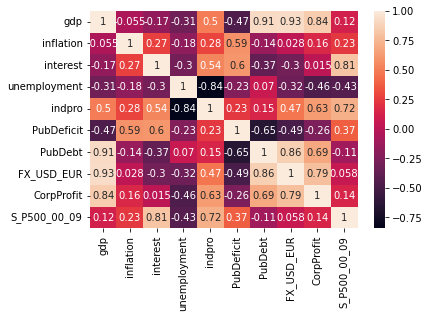

In [456]:
correlations_matrix=Data_00_09.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

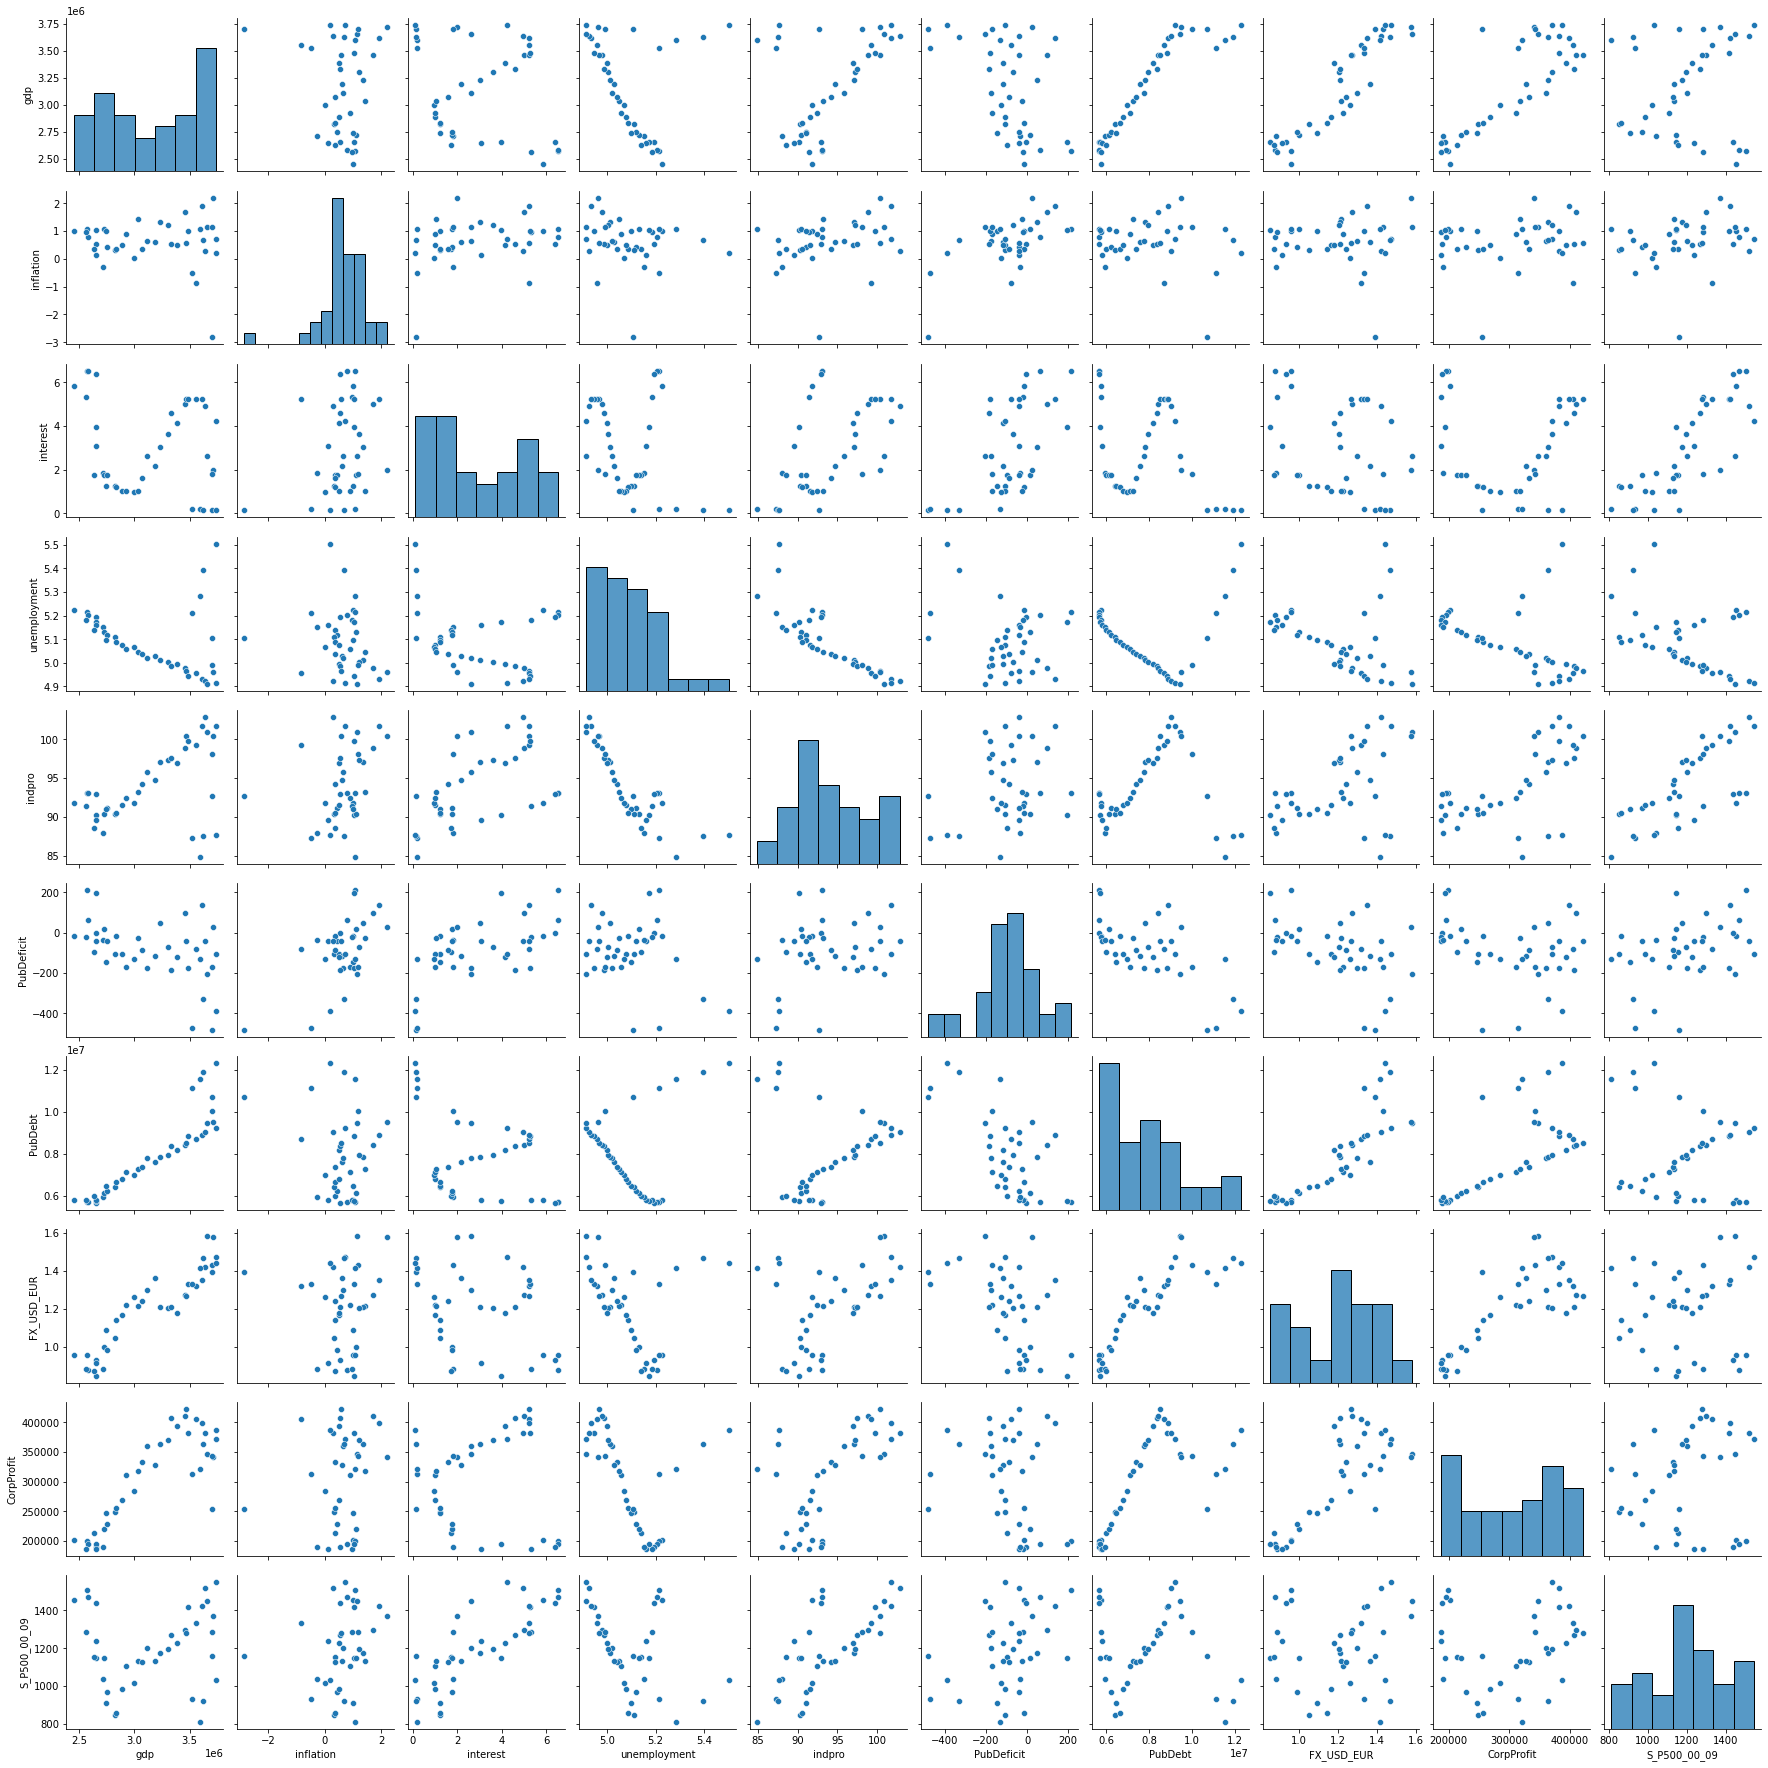

In [457]:
# cross plots
sns.pairplot(Data_00_09)


# VIII.2 - Correlation Analysis (DEC 2010-19)¶

In [458]:
# We´ll drop the column "Date", as it will not be used to calculate correlations  neither in the Model 

features_10_19=features_10_19.drop(['date'], axis=1)

features_10_19

,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit
0,3602418.0,0.401415,0.16,5.648051,89.3526,-327.929,12773123.0,1.3479,410643.0
1,3755370.0,0.475072,0.18,5.690289,91.2235,-288.540,13201792.0,1.2271,410193.0
2,3793867.0,0.093250,0.19,5.726967,93.4429,-288.519,13561622.0,1.3648,450705.0
3,3897315.0,0.294916,0.18,5.770942,92.5090,-369.438,14025215.0,1.3362,457202.0
4,3764835.0,1.264822,0.14,5.804344,93.0862,-461.847,14270114.0,1.4207,417589.0
5,3893028.0,1.743311,0.09,5.822589,93.5258,-141.807,14343087.0,1.4453,447938.0
6,3927583.0,0.408518,0.08,5.830605,95.8643,-326.541,14790340.0,1.3503,454621.0
7,4014288.0,-0.152056,0.07,5.847203,95.6050,-320.102,15222940.0,1.2939,489627.0
8,3960259.0,0.795639,0.13,5.815009,96.5592,-456.969,15606518.0,1.3356,506395.0
9,4047165.0,0.827532,0.16,5.781262,97.1756,-124.762,15855037.0,1.2590,501729.0


In [459]:
# Merging features and Target, so that we can appreciate the correlation among them

In [460]:
#Data_00_09=pd.merge(left=features_00_09,right=S_P500_00_09,how= 'inner',left_on='CorpProfit',right_on='S_P500_00_09')
#Data_00_09


Data_10_19=pd.concat([features_10_19,S_P500_10_19], axis=1)
Data_10_19

,gdp,inflation,interest,unemployment,indpro,PubDeficit,PubDebt,FX_USD_EUR,CorpProfit,S_P500_10_19
0,3602418.0,0.401415,0.16,5.648051,89.3526,-327.929,12773123.0,1.3479,410643.0,1132.99
1,3755370.0,0.475072,0.18,5.690289,91.2235,-288.540,13201792.0,1.2271,410193.0,1178.10
2,3793867.0,0.093250,0.19,5.726967,93.4429,-288.519,13561622.0,1.3648,450705.0,1027.37
3,3897315.0,0.294916,0.18,5.770942,92.5090,-369.438,14025215.0,1.3362,457202.0,1146.24
4,3764835.0,1.264822,0.14,5.804344,93.0862,-461.847,14270114.0,1.4207,417589.0,1271.87
5,3893028.0,1.743311,0.09,5.822589,93.5258,-141.807,14343087.0,1.4453,447938.0,1332.41
6,3927583.0,0.408518,0.08,5.830605,95.8643,-326.541,14790340.0,1.3503,454621.0,1339.67
7,4014288.0,-0.152056,0.07,5.847203,95.6050,-320.102,15222940.0,1.2939,489627.0,1099.23
8,3960259.0,0.795639,0.13,5.815009,96.5592,-456.969,15606518.0,1.3356,506395.0,1277.06
9,4047165.0,0.827532,0.16,5.781262,97.1756,-124.762,15855037.0,1.2590,501729.0,1419.04


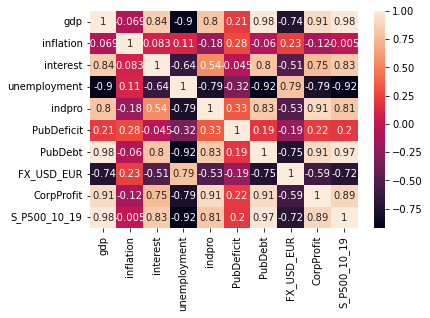

In [461]:
#Correlations for the dec 2000-09

correlations_matrix=Data_10_19.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

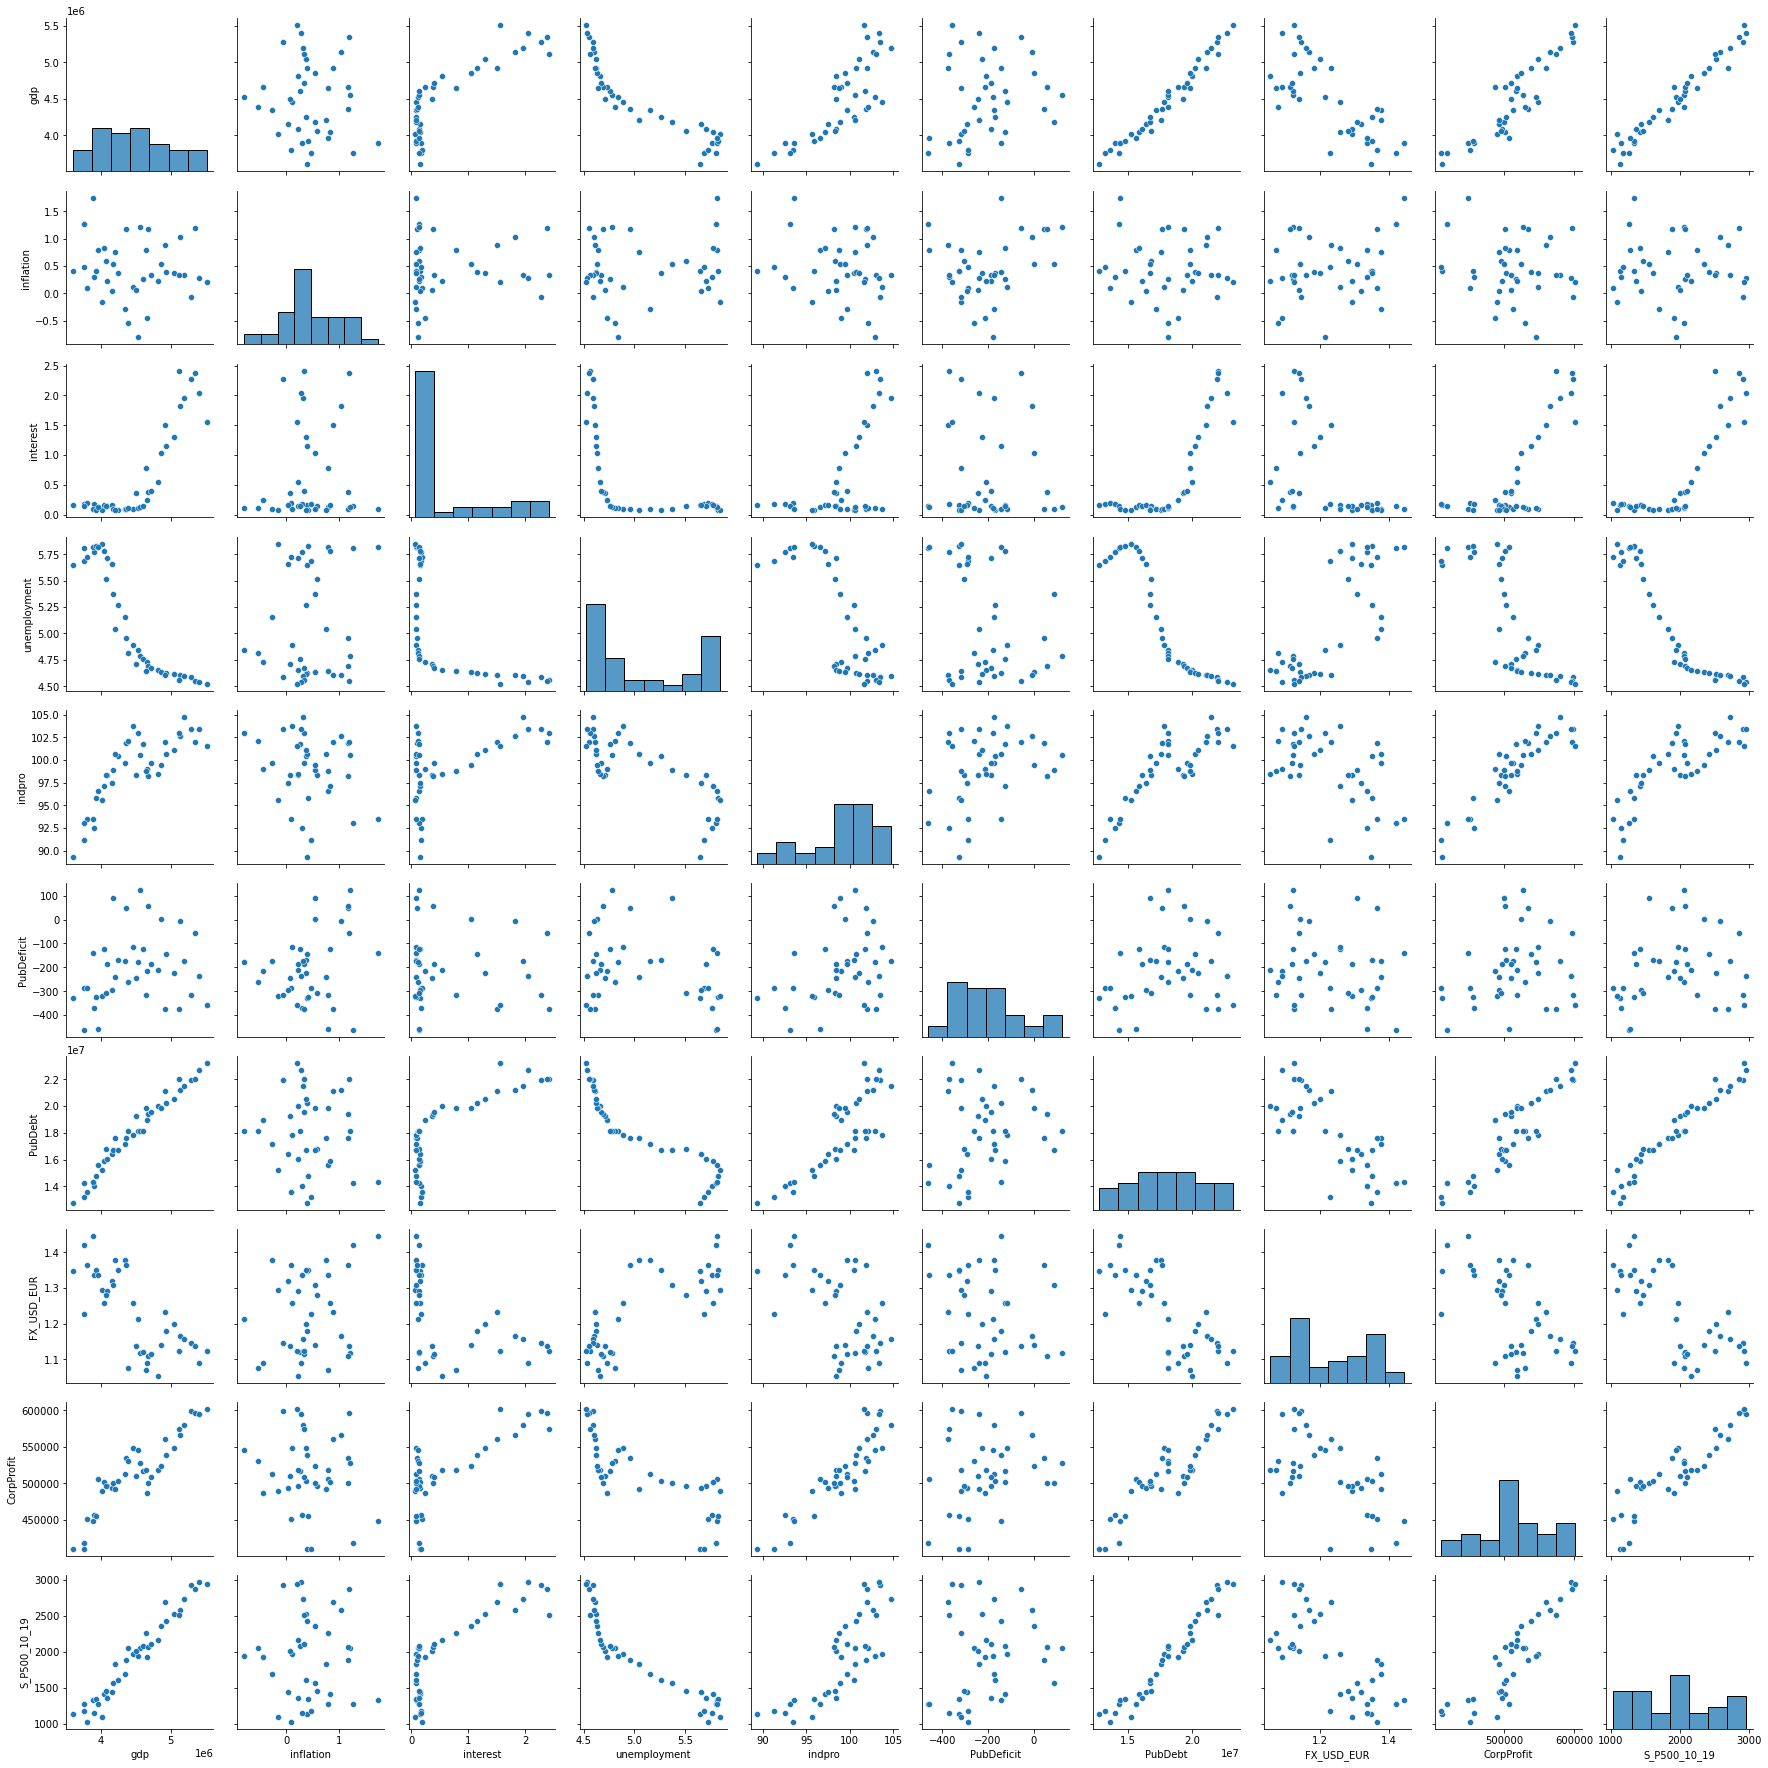

In [462]:
# cross plots
sns.pairplot(Data_10_19)

# XIX -  Building the Model

# XIX.1 -  Building the Model (dec 2000-09)

In [463]:
# Step_1) splitting: features (X) vs Target (Y)  

In [464]:
Data_00_09 = Data_00_09.drop(['unemployment','PubDebt','FX_USD_EUR'], axis=1) # dropping columns with low correlation with Y oy other X
X_00_09 = Data_00_09.drop(['S_P500_00_09'], axis=1)      # ppp
Y_00_09 = Data_00_09['S_P500_00_09']

In [465]:
X_00_09

,gdp,inflation,interest,indpro,PubDeficit,CorpProfit
0,2449139.0,0.990491,5.85,91.7697,-14.912,202125.0
1,2569476.0,1.059239,6.53,93.0382,211.241,199534.0
2,2578060.0,0.795807,6.52,93.1051,60.319,195302.0
3,2655679.0,0.539187,6.40,92.8738,-3.040,189599.0
4,2562436.0,0.957671,5.31,91.4006,-21.859,186999.0
5,2656364.0,1.043445,3.97,90.1857,194.256,194494.0
6,2651331.0,0.131431,3.07,89.5791,-41.121,186676.0
7,2711685.0,-0.281268,1.82,87.9665,-35.334,190546.0
8,2631119.0,0.357277,1.73,88.4895,-96.295,213123.0
9,2721842.0,1.086753,1.75,90.3410,15.806,220809.0


In [466]:
Y_00_09

0     1455.22
1     1505.97
2     1469.54
3     1436.23
4     1283.27
5     1145.87
6     1236.71
7     1038.55
8     1154.67
9     1146.54
10     968.65
11     847.91
12     909.03
13     858.48
14     982.32
15    1018.22
16    1108.48
17    1132.17
18    1128.94
19    1131.50
20    1202.08
21    1172.92
22    1194.44
23    1226.70
24    1268.80
25    1297.81
26    1280.19
27    1331.32
28    1416.60
29    1424.55
30    1519.43
31    1547.04
32    1447.16
33    1370.18
34    1284.91
35    1161.06
36     931.80
37     811.08
38     923.33
39    1029.85
Name: S_P500_00_09, dtype: float64

In [467]:
# Step_2)  Train-Test-Split (taking 20% of the historical data to test the model´s quality)

X_train_00_09, X_test_00_09, Y_train_00_09, Y_test_00_09 = train_test_split(X_00_09, Y_00_09, test_size=0.2)


In [468]:
# Normalising the numerical features  (X)

MinMaxtransformer = MinMaxScaler().fit(X_train_00_09)
X_norm_00_09 = MinMaxtransformer.transform(X_train_00_09)
X_n_00_09 = pd.DataFrame(X_norm_00_09,columns=X_train_00_09.columns)

X_n_00_09




,gdp,inflation,interest,indpro,PubDeficit,CorpProfit
0,0.964352,0.000000,0.006240,0.373274,0.000000,0.287756
1,0.160476,0.647877,0.254290,0.267375,0.635188,0.178227
2,0.995236,0.603064,0.000000,0.031240,0.133483,0.854746
3,0.275461,0.660555,0.138846,0.294864,0.538888,0.349243
4,0.075468,0.589179,0.460218,0.162869,0.635818,0.000000
5,0.079159,0.670343,0.979719,0.390080,0.690773,0.012412
6,0.780677,0.765883,0.801872,0.862082,0.438368,0.830300
7,0.814729,0.463964,0.009360,0.000000,0.014795,0.539661
8,0.892634,0.944661,0.800312,1.000000,0.892585,0.898377
9,0.079741,0.770715,0.600624,0.204702,0.975489,0.033198


In [469]:
#Training the model

linreg_00_09 = LinReg()
linreg_00_09.fit(X_norm_00_09,Y_train_00_09)

LinearRegression()

In [470]:

print(linreg_00_09.intercept_)
print(linreg_00_09.coef_)

889.0981494914638
[ 280.25446638  172.74163596  451.66292821  278.8256945  -168.28019338
 -377.26035196]


In [471]:
# checking the quality of the model

#for that, we apply the model to the data we kept aside for testing purposes

# ppp

# Normalising the numerical Test data  (X)

MinMaxtransformer = MinMaxScaler().fit(X_test_00_09)
Xt_norm_00_09 = MinMaxtransformer.transform(X_test_00_09)
Xt_n_00_09 = pd.DataFrame(Xt_norm_00_09,columns=X_test_00_09.columns)

Xt_n_00_09




yt_pred_linreg = linreg_00_09.predict(Xt_n_00_09)

yt_pred_linreg

C:\Users\pbsil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1336.90470645, 1257.92641508, 1344.76285281, 1276.71141833,
       1386.33805899, 1015.8026114 , 1462.60902184,  979.07343697])

In [472]:
train_r2 = linreg_00_09.score(X_norm_00_09, Y_train_00_09)
test_r2 = linreg_00_09.score(Xt_norm_00_09, Y_test_00_09)

print (f'Train R2: {train_r2} \nTest R2: {test_r2}')   # ppp

Train R2: 0.8511368461000379 
Test R2: 0.7584129889935076


# XIX.2 -  Building the Model (dec 2010-19)

In [473]:
Data_10_19 = Data_10_19.drop(['unemployment','PubDebt','FX_USD_EUR'], axis=1) # dropping columns with low correlation with Y oy other X
X_10_19 = Data_10_19.drop(['S_P500_10_19'], axis=1)      # ppp
Y_10_19 = Data_10_19['S_P500_10_19']

In [474]:
X_10_19

,gdp,inflation,interest,indpro,PubDeficit,CorpProfit
0,3602418.0,0.401415,0.16,89.3526,-327.929,410643.0
1,3755370.0,0.475072,0.18,91.2235,-288.540,410193.0
2,3793867.0,0.093250,0.19,93.4429,-288.519,450705.0
3,3897315.0,0.294916,0.18,92.5090,-369.438,457202.0
4,3764835.0,1.264822,0.14,93.0862,-461.847,417589.0
5,3893028.0,1.743311,0.09,93.5258,-141.807,447938.0
6,3927583.0,0.408518,0.08,95.8643,-326.541,454621.0
7,4014288.0,-0.152056,0.07,95.6050,-320.102,489627.0
8,3960259.0,0.795639,0.13,96.5592,-456.969,506395.0
9,4047165.0,0.827532,0.16,97.1756,-124.762,501729.0


In [475]:
Y_10_19

0     1132.99
1     1178.10
2     1027.37
3     1146.24
4     1271.87
5     1332.41
6     1339.67
7     1099.23
8     1277.06
9     1419.04
10    1365.51
11    1444.49
12    1462.42
13    1562.17
14    1614.96
15    1695.00
16    1831.98
17    1885.52
18    1973.32
19    1946.16
20    2058.20
21    2059.69
22    2077.42
23    1923.82
24    2012.66
25    2072.78
26    2102.95
27    2161.20
28    2257.83
29    2358.84
30    2429.01
31    2529.12
32    2695.81
33    2581.88
34    2726.71
35    2924.59
36    2510.03
37    2867.19
38    2964.33
39    2940.25
Name: S_P500_10_19, dtype: float64

In [476]:
# Step_2)  Train-Test-Split (taking 20% of the historical data to test the model´s quality)

X_train_10_19, X_test_10_19, Y_train_10_19, Y_test_10_19 = train_test_split(X_10_19, Y_10_19, test_size=0.2)

In [477]:
# Normalising the numerical features  (X)

MinMaxtransformer = MinMaxScaler().fit(X_train_10_19)
X_norm_10_19 = MinMaxtransformer.transform(X_train_10_19)
X_n_10_19 = pd.DataFrame(X_norm_10_19,columns=X_train_10_19.columns)

X_n_10_19

,gdp,inflation,interest,indpro,PubDeficit,CorpProfit
0,0.830145,0.443961,0.813853,1.000000,0.495019,0.888960
1,0.524862,0.418598,0.030303,0.808242,0.576449,0.556668
2,0.215599,0.255745,0.000000,0.406520,0.241855,0.415680
3,0.253319,0.401577,0.030303,0.586738,0.472133,0.450899
4,0.446266,0.360483,0.008658,0.933857,0.589637,0.719819
5,0.338657,0.463874,0.004329,0.721995,0.499749,0.484547
6,1.000000,0.399099,0.640693,0.795823,0.180035,1.000000
7,0.085019,0.812112,0.030303,0.242752,0.000000,0.038703
8,0.756072,0.460988,0.532468,0.764049,0.405056,0.722932
9,0.152124,1.000000,0.008658,0.271334,0.546074,0.197521


In [478]:
#Training the model

linreg_10_19 = LinReg()
linreg_10_19.fit(X_norm_10_19,Y_train_10_19)

LinearRegression()

In [479]:
print(linreg_10_19.intercept_)
print(linreg_10_19.coef_)

805.327507506405
[2023.78781499  212.8394974   170.62183511  725.97350921 -128.00680992
 -657.71852345]


In [480]:
# checking the quality of the model

#for that, we apply the model to the data we kept aside for testing purposes

# ppp

# Normalising the numerical Test data  (X)

MinMaxtransformer = MinMaxScaler().fit(X_test_10_19)
Xt_norm_10_19 = MinMaxtransformer.transform(X_test_10_19)
Xt_n_10_19 = pd.DataFrame(Xt_norm_10_19,columns=X_test_10_19.columns)

Xt_n_10_19




yt_pred_linreg = linreg_10_19.predict(Xt_n_10_19)

yt_pred_linreg

C:\Users\pbsil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 930.24414208, 2163.95321136, 2926.03805216, 2906.92667584,
       3068.92706259, 2000.37091224, 2165.43076963, 1757.71278472])

In [481]:
train_r2 = linreg_10_19.score(X_norm_10_19, Y_train_10_19)
test_r2 = linreg_10_19.score(Xt_norm_10_19, Y_test_10_19)

print (f'Train R2: {train_r2} \nTest R2: {test_r2}')   # ppp

Train R2: 0.9698129420327203 
Test R2: 0.8783286861697288
